In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [35]:
(x_train,_),(x_test,_) = tf.keras.datasets.mnist.load_data()

In [36]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [37]:
#shape[0]即第一个数60000，-1即进行28*28的计算

In [38]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

In [39]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

tf.cast（）的作用是执行tensorflow中的张量数据类型转换
cast(x,dtype,name=None)
x:待转换的数据（张量）
dytpe:目标数据类型第三个参数
name：可选参数，定义操作的名称
比如把int型转换为float型


In [40]:
x_train = tf.cast(x_train,tf.float32)/255
x_test = tf.cast(x_test,tf.float32)/255

In [41]:
input_size = 784
hidden_size = 32
output_size = 784

In [42]:
input = tf.keras.layers.Input(shape=(input_size,))

#encode
en = tf.keras.layers.Dense(hidden_size,activation='relu')(input)

#decode
de =  tf.keras.layers.Dense(output_size,activation='sigmoid')(en)

model = tf.keras.Model(inputs=input,outputs=de)

In [43]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [44]:
#可视化（安装了也执行不了，不知道为什么）

In [45]:
tf.keras.utils.plot_model(model,show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [46]:
model.compile(optimizer='adam',
              loss='mse'
)

In [47]:
model.fit(x_train,x_train,
         epochs=50,
         batch_size=256,
         shuffle=True,
         validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0703 - val_loss: 0.0414
Epoch 2/50
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0349 - val_loss: 0.0293
Epoch 3/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.0264 - val_loss: 0.0231
Epoch 4/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.0213 - val_loss: 0.0190
Epoch 5/50
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0179 - val_loss: 0.0163
Epoch 6/50
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0157 - val_loss: 0.0143
Epoch 7/50
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0137 - val_loss: 0.0126
Epoch 8/50
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0125 - val_loss: 0.0118
Epoch 9/50
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0117 - val_lo

In [48]:
#获取编码器

In [49]:
encoed = tf.keras.Model(inputs=input,outputs=en)

In [50]:
#获取解码器

In [59]:
input_de = tf.keras.layers.Input(shape=hidden_size)#解码器的输入
output_de = model.layers[-1](input_de)   #解码器的输出就是上面建立模型的最后一层

decode = tf.keras.Model(inputs=input_de,outputs=output_de)
decode.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [52]:
#进行测试

In [60]:
encoed_test = encoed(x_test)

In [61]:
encoed_test.shape

TensorShape([10000, 32])

In [62]:
x_test.shape

TensorShape([10000, 784])

In [63]:
decode_test = decode.predict(encoed_test)

In [65]:
decode_test.shape

(10000, 784)

In [68]:
x_test = x_test.numpy()#前面的数据类型为tensor类型要转换成numpy类型不然绘图不了

In [69]:
 n = 10

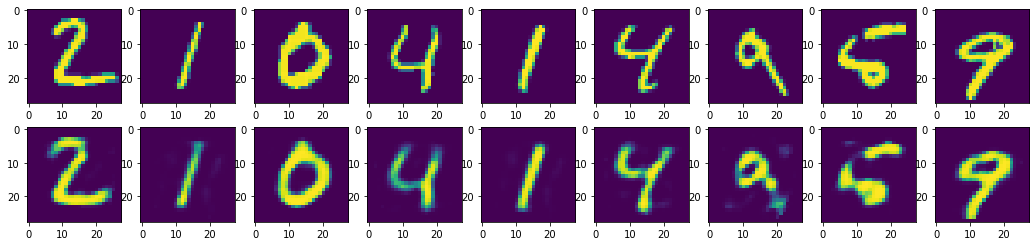

In [74]:
plt.figure(figsize=(20,4))#创建画布以英寸为单位
for i in range(1,n):       #for循环为左闭右开
    ax = plt.subplot(2,n,i) #绘制子图2行 n列 i张
    plt.imshow(x_test[i].reshape(28,28))#上面是784的张量要重构成图片
    ax = plt.subplot(2,n, i + n)
    plt.imshow(decode_test[i].reshape(28,28))